In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [134]:
with open("./election_results.json","r") as f:
    ge_results = json.load(f)

ethnicity_data = pd.read_csv("../data/raw/custom-filtered-2024-07-08T06_48_37Z.csv")
employment_data = pd.read_csv("../data/raw/custom-filtered-2024-07-08T16_37_36Z.csv")
age_data = pd.read_csv("../data/raw/custom-filtered-2024-07-08T16_18_30Z.csv")

In [135]:
constituencies_dict = {
    "Basildon South and East Thurrock": "South Basildon and East Thurrock",
    "Bathgate and Linlithgow": "Linlithgow and Bathgate",
    "Bedfordshire Mid": "Mid Bedfordshire",
    "Bedfordshire North": "North Bedfordshire",
    "B'ham Hall Green and Moseley": "Birmingham Hall Green and Moseley",
    "B'ham Hodge Hill and S'hull N": "Birmingham Hodge Hill and Solihull North",
    "Bridlington and the Wolds": "Bridlington and The Wolds",
    "Brighton Kemptown and P'haven": "Brighton Kemptown and Peacehaven",
    "Buckinghamshire Mid": "Mid Buckinghamshire",
    "Cambridgeshire North East": "North East Cambridgeshire",
    "Cambridgeshire North West": "North West Cambridgeshire",
    "Cambridgeshire South": "South Cambridgeshire",
    "Cheshire Mid": "Mid Cheshire",
    "Cities of London and W'minster": "Cities of London and Westminster",
    "Coatbridge and Bellshill": "Coatbridge and Bellshill",
    "Corby and East Northants": "Corby and East Northamptonshire",
    "Cornwall North": "North Cornwall",
    "Cornwall South East": "South East Cornwall",
    "Cotswolds North": "North Cotswolds",
    "Cotswolds South": "South Cotswolds",
    "Cowdenbeath and Kirkcaldy": "Kirkcaldy and Cowdenbeath",
    "Cumbernauld and Kirkintilloch": "Cumbernauld and Kirkintilloch",
    "Derbyshire Mid": "Mid Derbyshire",
    "Derbyshire North East": "North East Derbyshire",
    "Derbyshire South": "South Derbyshire",
    "Devon Central": "Central Devon",
    "Devon North": "North Devon",
    "Devon South": "South Devon",
    "Devon South West": "South West Devon",
    "Doncaster East and Axholme": "Doncaster East and the Isle of Axholme",
    "Dorset Mid and North Poole": "Mid Dorset and North Poole",
    "Dorset North": "North Dorset",
    "Dorset South": "South Dorset",
    "Dorset West": "West Dorset",
    "Durham, City of": "City of Durham",
    "Durham North": "North Durham",
    "Essex North West": "North West Essex",
    "Hampshire East": "East Hampshire",
    "Hampshire North East": "North East Hampshire",
    "Hampshire North West": "North West Hampshire",
    "Herefordshire North": "North Herefordshire",
    "Hertfordshire North East": "North East Hertfordshire",
    "Hertfordshire South West": "South West Hertfordshire",
    "Hull East": "Kingston upon Hull East",
    "Hull North and Cottingham": "North Hull and Cottingham",
    "Hull West and Haltemprice": "Kingston upon Hull West and Haltemprice",
    "Kingswinford and Staffs South": "Kingswinford and South Staffordshire",
    "Lancashire West": "West Lancashire",
    "Leicestershire Mid": "Mid Leicestershire",
    "Leicestershire North West": "North West Leicestershire",
    "Leicestershire South": "South Leicestershire",
    "Livingston": "Livingston",
    "Middlesbrough and Thornaby E": "Middlesbrough and Thornaby East",
    "Middlesbrough South and East Cleve.": "Middlesbrough South and East Cleveland",
    "Midlothian": "Midlothian",
    "Newcastle Central and West": "Newcastle upon Tyne Central and West",
    "Newcastle East and Wallsend": "Newcastle upon Tyne East and Wallsend",
    "Newcastle North": "Newcastle upon Tyne North",
    "Norfolk Mid": "Mid Norfolk",
    "Norfolk North": "North Norfolk",
    "Norfolk North West": "North West Norfolk",
    "Norfolk South": "South Norfolk",
    "Norfolk South West": "South West Norfolk",
    "North Down": "North Down",
    "Northamptonshire South": "South Northamptonshire",
    "Northumberland North": "North Northumberland",
    "Oldham West Chadderton and Royton": "Oldham West, Chadderton and Royton",
    "Pembrokeshire Mid and South": "Mid and South Pembrokeshire",
    "Pontefract, C'ford and Knot.": "Pontefract, Castleford and Knottingley",
    "Renfrewshire East": "East Renfrewshire",
    "Rutherglen": "Rutherglen",
    "Sheffield Brightside": "Sheffield Brightside and Hillsborough",
    "Shropshire North": "North Shropshire",
    "Shropshire South": "South Shropshire",
    "Somerset North": "North Somerset",
    "Somerset North East and Hanham": "North East Somerset and Hanham",
    "St Neots and Mid Cambs": "St Neots and Mid Cambridgeshire",
    "Stone, Gt Wyrley and Penkridge": "Stone, Great Wyrley and Penkridge",
    "Strangford": "Strangford",
    "Suffolk Central and North Ipswich": "Central Suffolk and North Ipswich",
    "Suffolk South": "South Suffolk",
    "Suffolk West": "West Suffolk",
    "Surrey East": "East Surrey",
    "Sussex Mid": "Mid Sussex",
    "Thanet East": "East Thanet",
    "Warwickshire North and Bedworth": "North Warwickshire and Bedworth",
    "Wiltshire East": "East Wiltshire",
    "Wiltshire South West": "South West Wiltshire",
    "Worcestershire West": "West Worcestershire",
    "Worthing East and Shoreham": "East Worthing and Shoreham",
    "Ynys Mon": "Ynys Môn"
}

In [136]:
ge_results_reformat = {}
for const in ge_results.keys():
    reformatted =  const.replace("&amp;","and").replace(" N,"," North,").replace(" N "," North ").replace(" S,"," South,").replace(" S "," South ").replace(" E,"," East,").replace(" E "," East ").replace(" W,"," West,").replace(" W "," West ")
    if reformatted in constituencies_dict.keys():
        reformatted = constituencies_dict[reformatted]
    if reformatted in list(ethnicity_data["Post-2019 Westminster Parliamentary constituencies"]):
        ge_results_reformat[reformatted] = ge_results[const]

constituency_list = list(ge_results_reformat.keys())

In [137]:
df_data = {"Post-2019 Westminster Parliamentary constituencies Code":[],
           "Party":[],
           "Candidate":[],
           "Votes":[]}

for key, info in ge_results_reformat.items():
    for i in range(len(info)):
        df_data["Post-2019 Westminster Parliamentary constituencies Code"].append(key)
        df_data["Party"].append(info[i]["PartyParty"])
        df_data["Candidate"].append(info[i]["CandidateCandidate"])
        df_data["Votes"].append(int(info[i]["VotesVotes"].replace(",","")))

results_df = pd.DataFrame(df_data)
results_df.to_csv("../data/processed/GE2024_vote_counts.csv",index=False)

In [139]:
import numpy as np
import pandas as pd

broad_ethnicity = {
    "Asian": ['Asian, Asian British or Asian Welsh: Bangladeshi',
       'Asian, Asian British or Asian Welsh: Chinese',
       'Asian, Asian British or Asian Welsh: Indian',
       'Asian, Asian British or Asian Welsh: Other Asian',
       'Asian, Asian British or Asian Welsh: Pakistani'],
    "Black" : ['Black, Black British, Black Welsh, Caribbean or African: African',
       'Black, Black British, Black Welsh, Caribbean or African: Caribbean',
       'Black, Black British, Black Welsh, Caribbean or African: Other Black'],
    "Mixed":['Mixed or Multiple ethnic groups: Other Mixed or Multiple ethnic groups',
       'Mixed or Multiple ethnic groups: White and Asian',
       'Mixed or Multiple ethnic groups: White and Black African',
       'Mixed or Multiple ethnic groups: White and Black Caribbean'],
    "White":['White: English, Welsh, Scottish, Northern Irish or British',
       'White: Gypsy or Irish Traveller', 'White: Irish',
       'White: Other White', 'White: Roma'],
    "Other": ['Other ethnic group: Any other ethnic group',
       'Other ethnic group: Arab']
}

# Define keys
party_keys = [f"Prop_{x}" for x in np.unique(results_df.Party)]
ethnicity_keys = [f"Prop_{x}" for x in np.unique(ethnicity_data["Ethnic group (20 categories)"])]
employment_keys = [f"Prop_{x}" for x in np.unique(employment_data["Economic activity status (7 categories)"])]
age_keys = [f"Prop_{x}" for x in np.unique(age_data["Age (6 categories)"])]

keys = party_keys + ethnicity_keys + employment_keys + age_keys + ["Constituency", "Winning_party"]

# Initialize dictionary with empty lists
df_data = {key: [] for key in keys}

# Convert constituency_list to a set for faster membership checking
constituency_set = set(constituency_list)

# Filter relevant data once
results_filtered = results_df[results_df["Post-2019 Westminster Parliamentary constituencies Code"].isin(constituency_set)]
ethnicity_filtered = ethnicity_data[ethnicity_data["Post-2019 Westminster Parliamentary constituencies"].isin(constituency_set)]
employment_filtered = employment_data[employment_data["Post-2019 Westminster Parliamentary constituencies"].isin(constituency_set)]
age_filtered = age_data[age_data["Post-2019 Westminster Parliamentary constituencies"].isin(constituency_set)]

# Group data by constituency
results_grouped = results_filtered.groupby("Post-2019 Westminster Parliamentary constituencies Code")
ethnicity_grouped = ethnicity_filtered.groupby("Post-2019 Westminster Parliamentary constituencies")
employment_grouped = employment_filtered.groupby("Post-2019 Westminster Parliamentary constituencies")
age_grouped = age_filtered.groupby("Post-2019 Westminster Parliamentary constituencies")

for const, const_results in results_grouped:
    # Calculate proportion of votes for each party
    total_votes = const_results["Votes"].sum()
    for party in party_keys:
        party_name = party.replace("Prop_", "")
        party_votes = const_results[const_results["Party"] == party_name]["Votes"].sum()
        df_data[party].append(party_votes / total_votes if total_votes != 0 else 0)
    
    # Determine the winning party
    winning_party = const_results.loc[const_results["Votes"].idxmax(), "Party"]
    df_data["Winning_party"].append(winning_party)
    
    # Append constituency
    df_data["Constituency"].append(const)

# Group by ethnicity data
for const, const_ethnicity in ethnicity_grouped:
    total_observation = const_ethnicity["Observation"].sum()
    for ethnicity in ethnicity_keys:
        if "Does not apply" not in ethnicity:
            ethnicity_name = ethnicity.replace("Prop_", "")
            ethnicity_count = const_ethnicity[const_ethnicity["Ethnic group (20 categories)"] == ethnicity_name]["Observation"].sum()
            df_data[ethnicity].append(ethnicity_count / total_observation if total_observation != 0 else 0)
        else:
            continue
        
# Group by employment data
for const, const_employment in employment_grouped:
    total_observation = const_employment["Observation"].sum()
    for employment in employment_keys:
        if "Does not apply" not in employment:
            emplyoment_name = employment.replace("Prop_", "")
            employment_count = const_employment[const_employment["Economic activity status (7 categories)"] == emplyoment_name]["Observation"].sum()
            df_data[employment].append(employment_count / total_observation if total_observation != 0 else 0)
        else:
            continue

# Group by age data
for const, const_age in age_grouped:
    total_observation = const_age["Observation"].sum()
    for age in age_keys:
        if "Does not apply" not in age:
            age_name = age.replace("Prop_", "")
            age_count = const_age[const_age["Age (6 categories)"] == age_name]["Observation"].sum()
            df_data[age].append(age_count / total_observation if total_observation != 0 else 0)
        else:
            continue

df_data.pop("Prop_Does not apply")

# Create DataFrame
df = pd.DataFrame(df_data)

for key in broad_ethnicity.keys():
    df[f"Prop_{key}"] = df[[f"Prop_{x}" for x in broad_ethnicity[key]]].sum(axis=1)


In [169]:
df.to_csv("../reports/constitiency_polling_domographics.csv",index=False)

In [172]:
age_keys

['Prop_Aged 15 years and under',
 'Prop_Aged 16 to 24 years',
 'Prop_Aged 25 to 34 years',
 'Prop_Aged 35 to 49 years',
 'Prop_Aged 50 to 64 years',
 'Prop_Aged 65 years and over']

In [178]:
list(df.columns)

['Prop_Abolish the Welsh Assembly Party',
 'Prop_Alliance for Democracy and Freedom',
 'Prop_Alliance for Green Socialism',
 'Prop_Animal Welfare Party',
 'Prop_Ashfield Independents',
 'Prop_Blue Revolution',
 'Prop_British Democratic Party',
 'Prop_Chesterfield Independents',
 'Prop_Christian Peoples Alliance',
 'Prop_Climate',
 'Prop_Communist Future',
 'Prop_Communist League',
 'Prop_Communist Party of Britain',
 'Prop_Confelicity',
 'Prop_Consensus',
 'Prop_Conservative',
 'Prop_Count Binface Party',
 'Prop_Democracy for Chorley',
 'Prop_English Constitution Party',
 'Prop_English Democrats',
 'Prop_Fairer Voting Party',
 'Prop_Freedom Alliance',
 'Prop_Green',
 'Prop_Hampshire Independents',
 'Prop_Heritage Party',
 'Prop_Independent',
 'Prop_Independent Alliance Kent',
 'Prop_Independent Network',
 'Prop_Independent Oxford Alliance',
 'Prop_Independents for Direct Democracy',
 'Prop_Kingston Independent Residents Group',
 'Prop_Labour',
 'Prop_Liberal',
 'Prop_Liberal Democrat',

In [173]:
df

,Prop_Abolish the Welsh Assembly Party,Prop_Alliance for Democracy and Freedom,Prop_Alliance for Green Socialism,Prop_Animal Welfare Party,Prop_Ashfield Independents,Prop_Blue Revolution,Prop_British Democratic Party,Prop_Chesterfield Independents,Prop_Christian Peoples Alliance,Prop_Climate,...,Prop_Aged 35 to 49 years,Prop_Aged 50 to 64 years,Prop_Aged 65 years and over,Constituency,Winning_party,Prop_Asian,Prop_Black,Prop_Mixed,Prop_White,Prop_Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179638,0.208793,0.205520,Aberafan Maesteg,Labour,0.015437,0.002214,0.010716,0.968954,0.002679
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.207732,0.187737,0.161083,Aldershot,Labour,0.132777,0.023674,0.025002,0.793341,0.025207
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.177711,0.212078,0.227750,Aldridge-Brownhills,Conservative,0.086983,0.020768,0.024027,0.853639,0.014583
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219046,0.194859,0.190282,Altrincham and Sale West,Labour,0.120815,0.016518,0.032183,0.805614,0.024870
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.191326,0.208382,0.197909,Alyn and Deeside,Labour,0.011149,0.002263,0.009944,0.972647,0.003997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.214687,0.178175,0.146844,Wythenshawe and Sale East,Labour,0.082890,0.048216,0.043036,0.800844,0.025013
570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.173464,0.204768,0.242813,Yeovil,Liberal Democrat,0.018070,0.005731,0.012882,0.958616,0.004701
571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159195,0.220695,0.264308,Ynys Môn,Plaid Cymru,0.006243,0.001510,0.008682,0.981242,0.002323
572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.175034,0.160813,0.138272,York Central,Labour,0.052604,0.008932,0.022989,0.902626,0.012849


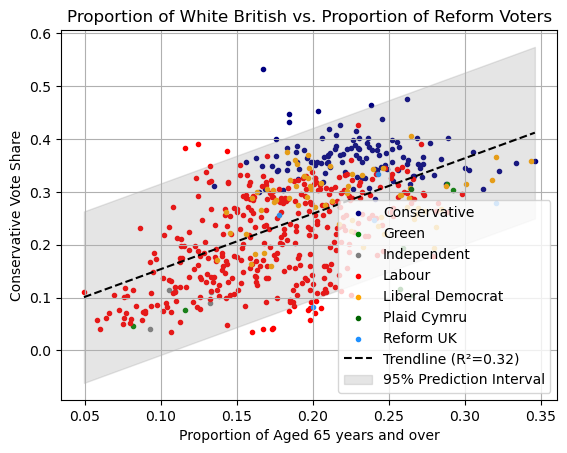

Points outside the upper prediction interval:
                          Constituency    prop_1    prop_2 Winning_party
110                 Chelsea and Fulham  0.124172  0.390610        Labour
139                      Croydon South  0.175518  0.400117  Conservative
163                 Earley and Woodley  0.143319  0.378120        Labour
179                      Epping Forest  0.184324  0.432017  Conservative
224                        Harrow East  0.167060  0.533018  Conservative
233                             Hendon  0.116094  0.383944        Labour
238                          Hertsmere  0.184424  0.446831  Conservative
417      Ruislip, Northwood and Pinner  0.203488  0.453717  Conservative
486  Stone, Great Wyrley and Penkridge  0.238450  0.464812  Conservative
Points outside the lower prediction interval:
0                 Aberafan Maesteg
7                         Ashfield
31                      Birkenhead
54                          Bootle
106             Ceredigion Preseli
159

In [167]:
from scipy import stats
import numpy as np
prop_ref_df = df

party_colors = {"Labour":"red",
                "Conservative":"navy",
                "Liberal Democrat":"orange",
                "Green":"green",
                "Plaid Cymru":"darkgreen",
                "Independent":"gray",
                "Reform UK": "dodgerblue"}

prop_1 = "Prop_Aged 65 years and over"
prop_2 = "Prop_Conservative"
prop_ref_df = prop_ref_df.mask(prop_ref_df[prop_2] == 0).dropna()

# Scatter plot
for party in np.unique(prop_ref_df["Winning_party"]):
    masked_df = prop_ref_df.mask(prop_ref_df["Winning_party"] != party)
    if party in party_colors.keys():
        color = party_colors[party]
    else:
        color="black"
    plt.scatter(masked_df[prop_1], masked_df[prop_2], marker=".", color=color, label=party)

# Fit and plot the trendline
slope, intercept, r_value, p_value, std_err = stats.linregress(prop_ref_df[prop_1], prop_ref_df[prop_2])
x = np.linspace(min(prop_ref_df[prop_1]), max(prop_ref_df[prop_1]), 100)
y = slope * x + intercept
plt.plot(x, y, color='black', label=f'Trendline (R²={r_value**2:.2f})', linestyle="--",)

# Calculate prediction interval
# Number of data points
n = len(prop_ref_df[prop_1])
# T-value for 95% confidence interval
t_value = stats.t.ppf(0.975, df=n-2)

# Standard error of the regression
se_regression = np.sqrt(np.sum((prop_ref_df[prop_2] - (slope * prop_ref_df[prop_1] + intercept)) ** 2) / (n - 2))

# Mean and variance of the x-values
mean_x = np.mean(prop_ref_df[prop_1])
var_x = np.var(prop_ref_df[prop_1], ddof=1)

# Predicted values and standard error of prediction for each data point
predicted_y = slope * prop_ref_df[prop_1] + intercept
se_prediction_each = se_regression * np.sqrt(1/n + (prop_ref_df[prop_1] - mean_x)**2 / (n * var_x))

# Upper and lower bounds
upper_bound = predicted_y + t_value * se_prediction_each
lower_bound = predicted_y - t_value * se_prediction_each

# Plot the prediction intervals
plt.fill_between(x, y - t_value * se_regression, y + t_value * se_regression, color='gray', alpha=0.2, label='95% Prediction Interval')

# Customizing the plot
plt.title('Proportion of White British vs. Proportion of Reform Voters')
plt.xlabel(f'Proportion of {prop_1.replace("Prop_","")}')
plt.ylabel(f'{prop_2.replace("Prop_","")} Vote Share')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.show()

# Identify points outside the prediction interval
outside_upper = prop_ref_df[prop_ref_df[prop_2] > (slope * prop_ref_df[prop_1] + intercept + t_value * se_regression)]
outside_lower = prop_ref_df[prop_ref_df[prop_2] < (slope * prop_ref_df[prop_1] + intercept - t_value * se_regression)]

print("Points outside the upper prediction interval:")
print(outside_upper[["Constituency",prop_1, prop_2, "Winning_party"]].rename({prop_1:"prop_1", prop_2:"prop_2"}, axis=1))

print("Points outside the lower prediction interval:")
print(outside_lower.Constituency)
